## Domain of Project - Big Data Analysis in Finance

### Proposed Project Title - Developing a Predictive Model for Investment Returns Through User Input Parameters.

#### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

#### GETTING DATA

In [2]:
#creating a directory to get all the csv files from the system
directory = 'C:/Users/Roopali Sudra/Desktop/DSE_GL/Capstone Project'

In [3]:
#creating a dataframe to add our merged csv files
m_data = pd.DataFrame()

In [4]:
#This first iterates over the files present in the specified directory using the os.listdir() function assigns it to the variable filename.
#Second line checks if the current file being iterated has a file extension of ".csv".
#Third line constructs the complete file path by joining the directory path and the current filename by creating a path to csv files.
#Fourth line reads the CSV file using the pd.read_csv() function and assigns it to the variable `data`.
#Fifth line concatenates the `data` DataFrame with the `merged_data` DataFrame using the pd.concat() function.
#we use `ignore_index=True` ensures that the resulting DataFrame has a new continuous index.

for filename in os.listdir(directory):    
    if filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)
        data = pd.read_csv(file_path)
        m_data = pd.concat([m_data, data], ignore_index=True)

In [5]:
m_data

,Investment type,Transaction Date,Investment Amount,Closing price,Holding period,Market volatility,Inflation Rate,GDP Rate
0,Bond,31-05-2014,790002,11694.43,9,0.28,8.33,4.6
1,Bond,30-11-2019,391094,12380.75,7,0.48,5.54,4.5
2,Bond,30-06-2015,1460404,7238.14,14,0.24,5.40,7.3
3,Bond,31-12-2013,853965,6621.14,3,0.21,10.60,4.8
4,Bond,31-07-2021,9923,18409.36,13,0.21,5.59,10.0
...,...,...,...,...,...,...,...,...
99995,Stocks,31-03-2013,314121,1121.00,6,0.27,8.30,4.6
99996,Stocks,31-07-2019,1273206,73.00,4,0.31,3.19,5.1
99997,Stocks,30-11-2015,1899471,8435.00,20,0.18,5.41,7.4
99998,Stocks,31-01-2015,1996907,4063.00,2,0.16,5.19,6.3


In [6]:
#just downloaded the merged data as csv file
m_data.to_csv('merged_data.csv', index=False)

## DATA DICTIONARY 

### Categorical variables:
1. Investment type: This variable represents the type of investment, such as Bond, Debentures, Gold, Mutual Fund, or Stocks.
2. Transaction Date: This variable represents the date of the investment transaction.
    
### Numeric variables:
1. Investment Amount: This variable represents the amount of investment made.
2. Closing price: This variable denotes the closing price of the investment.
3. Holding period: This variable indicates the duration of holding the investment.
4. Transaction Fees: This variable represents the fees associated with the transaction.
5. Market volatility: This variable measures the volatility or variability of the market.
6. Inflation Rate: This variable represents the rate of inflation.
7. GDP Rate: This variable denotes the rate of economic growth.

In [7]:
m_data.head()

,Investment type,Transaction Date,Investment Amount,Closing price,Holding period,Market volatility,Inflation Rate,GDP Rate
0,Bond,31-05-2014,790002,11694.43,9,0.28,8.33,4.6
1,Bond,30-11-2019,391094,12380.75,7,0.48,5.54,4.5
2,Bond,30-06-2015,1460404,7238.14,14,0.24,5.40,7.3
3,Bond,31-12-2013,853965,6621.14,3,0.21,10.60,4.8
4,Bond,31-07-2021,9923,18409.36,13,0.21,5.59,10.0


# DATA PREPARATION

### Redundant Columns

1. Investment type: This column represents the type of investment. It is an important categorical variable that will be potentially contribute to the predictive model.

2. Transaction Date: This column provides important information about the timing of the investment, such as whether it was made during a specific time period or season. This information can be helpful for understanding patterns, trends, and seasonal effects on investment returns. Therefore, we should keep this column in the dataset 

3. Investment Amount: This column represents the amount invested. It is a numeric variable that is going to have significant impact on investment returns. It should be retained for the predictive model.

4. Closing Price: This column represents the closing price of the investment. It is a numeric variable that provides information about the value of the investment at a particular point in time. It should be retained for the predictive model.

5. Holding Period: This column represents the duration of the investment holding period. It provides information about the length of time the investment was held and can be relevant for predicting returns. It should be retained for the predictive model.

6. Transaction Fees: This column represents the fees associated with the investment transaction. It is a numeric variable that can impact the overall returns. It should be retained for the predictive model.

7. Market Volatility: This column represents the volatility of the market. It is a numeric variable that can provide insights into the risk associated with the investment. It should be retained for the predictive model.

8. Inflation Rate: This column represents the rate of inflation. It is a numeric variable that can have an impact on investment returns. It should be retained for the predictive model.

9. GDP Rate: This column represents the rate of GDP growth. It is a numeric variable that can provide macroeconomic insights related to investment returns. It should be retained for the predictive model.

#### Based on the project objectives, all the columns in the dataset seem to have relevance and contribute to the predictive model. Hence, there are no identified redundant columns in the dataset.

### Getting the shape of the dataset that is number of rows and columns

In [8]:
m_data.shape

(100000, 8)

### Getting the info of the dataset

In [9]:
m_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Investment type    100000 non-null  object 
 1   Transaction Date   100000 non-null  object 
 2   Investment Amount  100000 non-null  int64  
 3   Closing price      100000 non-null  float64
 4   Holding period     100000 non-null  int64  
 5   Market volatility  100000 non-null  float64
 6   Inflation Rate     100000 non-null  float64
 7   GDP Rate           100000 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 6.1+ MB


#### We need to change the data type for the transaction date column

### Null Values 

In [10]:
nullvalues = m_data.isna().sum()
nullvalues

Investment type      0
Transaction Date     0
Investment Amount    0
Closing price        0
Holding period       0
Market volatility    0
Inflation Rate       0
GDP Rate             0
dtype: int64

#### There are no values in our dataset. 

### Duplicate Values

In [11]:
m_data.duplicated().sum()

0

#### Data does not have any duplicates!

### OBSERVATIONS 

* To develop our predictive model using a supervised learning algorithm, it is essential to have the target variables included in our dataset. Since the target columns were not available initially, we have imputed them in our dataset. In addition, we have introduced two additional columns to enhance the dataset. 
1. The first column represents the risk level for different investment types based on varying investment amounts. 
2. The second column denotes the maturity amount, taking into account the investment amount, tenure, and risk level. 

These additional features provide valuable information that can potentially enhance the performance and accuracy of our predictive model.

* To simplify our calculations and enhance clarity, we will modify the dataset by extracting the year from the transaction date and renaming the column as "YEAR." 

 * Renaming the columns for improved clarity and conciseness and also to provide a more descriptive label.

Transaction Date -> `YEAR`

Closing Price -> `PRICE`

Holding Period - > `TENURE`

* The analysis of inflation rate and GDP rate will be conducted on a yearly basis instead of a monthly basis, aligning with the investment tenure measured in years.

* By making these changes, we aim to streamline the dataset and ensure compatibility with the time frame of our analysis.

## Column Modifications

#### 1. Renaming the columns

In [12]:
# Rename the columns
new_data = m_data.rename(columns={'Transaction Date': 'Year', 'Closing price': 'Price', 'Holding period': 'Tenure'})
new_data

,Investment type,Year,Investment Amount,Price,Tenure,Market volatility,Inflation Rate,GDP Rate
0,Bond,31-05-2014,790002,11694.43,9,0.28,8.33,4.6
1,Bond,30-11-2019,391094,12380.75,7,0.48,5.54,4.5
2,Bond,30-06-2015,1460404,7238.14,14,0.24,5.40,7.3
3,Bond,31-12-2013,853965,6621.14,3,0.21,10.60,4.8
4,Bond,31-07-2021,9923,18409.36,13,0.21,5.59,10.0
...,...,...,...,...,...,...,...,...
99995,Stocks,31-03-2013,314121,1121.00,6,0.27,8.30,4.6
99996,Stocks,31-07-2019,1273206,73.00,4,0.31,3.19,5.1
99997,Stocks,30-11-2015,1899471,8435.00,20,0.18,5.41,7.4
99998,Stocks,31-01-2015,1996907,4063.00,2,0.16,5.19,6.3


#### 2. Changing the datatype

In [13]:
new_data['Year'] = pd.to_datetime(new_data['Year'])

In [14]:
#verifying the year column data type
print(new_data['Year'].dtypes)

datetime64[ns]


#### 3. Extracting only the year from the column of Year

In [15]:
new_data['Year'] = pd.to_datetime(new_data['Year']).dt.year

#### 4. Adding yearly inflation rates

In [16]:
inflation_mapping = {
    2012: 9.48,
    2013: 10.02,
    2014: 6.67,
    2015: 4.91,
    2016: 4.95,
    2017: 3.33,
    2018: 3.94,
    2019: 3.73,
    2020: 6.62,
    2021: 5.13,
    2022: 6.5
}

new_data['Inflation Rate'] = new_data['Year'].replace(inflation_mapping)

#### 5. Adding yearly GDP rates

In [17]:
gdp_mapping = {
    2012: 5.46,
    2013: 6.39,
    2014: 7.41,
    2015: 8.00,
    2016: 8.26,
    2017: 6.80,
    2018: 6.45,
    2019: 3.74,
    2020: -6.6,
    2021: 8.68,
    2022: 7.2
}

new_data['GDP Rate'] = new_data['Year'].replace(gdp_mapping)

In [18]:
new_data

,Investment type,Year,Investment Amount,Price,Tenure,Market volatility,Inflation Rate,GDP Rate
0,Bond,2014,790002,11694.43,9,0.28,6.67,7.41
1,Bond,2019,391094,12380.75,7,0.48,3.73,3.74
2,Bond,2015,1460404,7238.14,14,0.24,4.91,8.00
3,Bond,2013,853965,6621.14,3,0.21,10.02,6.39
4,Bond,2021,9923,18409.36,13,0.21,5.13,8.68
...,...,...,...,...,...,...,...,...
99995,Stocks,2013,314121,1121.00,6,0.27,10.02,6.39
99996,Stocks,2019,1273206,73.00,4,0.31,3.73,3.74
99997,Stocks,2015,1899471,8435.00,20,0.18,4.91,8.00
99998,Stocks,2015,1996907,4063.00,2,0.16,4.91,8.00


In [19]:
#verifying the column data types
print(new_data['Inflation Rate'].dtypes)
print(new_data['GDP Rate'].dtypes)

float64
float64


#### 6.Renaming the columns into capital letters for easy reference

In [20]:
new_data = new_data.rename(columns={'Year': 'YEAR', 'Price': 'PRICE', 'Tenure': 'TENURE','Investment type' : 'INVESTMENT TYPE','Investment Amount' : 'INVESTMENT AMOUNT','Market volatility' : 'MARKET VOLATILITY', 'Inflation Rate' : 'INFLATION RATE', 'GDP Rate' : 'GDP RATE'})

In [21]:
new_data['INVESTMENT TYPE'].unique()

array(['Bond', 'Debentures', 'Gold', 'Mutual Fund', 'Stocks'],
      dtype=object)

#### 7. Adding the transaction fees column

In [23]:
def calculate_transaction_fees(investment_amount):
    if 5000 <= investment_amount <= 10000:
        return 0.01 * investment_amount  # 1% of investment_amount
    elif 10000 < investment_amount <= 100000:
        return 0.03 * investment_amount # 1% of investment_amount
    elif 100000 < investment_amount <= 500000:
        return 0.05 * investment_amount # 3% of investment_amount
    elif 500000 < investment_amount <= 2000000:
        return 0.07 * investment_amount
    else:
        return None

# Apply the function to create the "transaction_fees" column
new_data['TRANSACTION FEES'] = new_data['INVESTMENT AMOUNT'].apply(calculate_transaction_fees)

#### 8. ADDING THE RISK LEVEL COLUMN

In [24]:
# Create a new column for risk level
new_data['RISK LEVEL'] = ''

In [25]:
# Assign risk level as "High Risk" for bonds
new_data.loc[new_data['INVESTMENT TYPE'] == 'Bond', 'RISK LEVEL'] = 'High Risk'

In [26]:
# Assign risk level as "High Risk" for stocks
new_data.loc[new_data['INVESTMENT TYPE'] == 'Stocks', 'RISK LEVEL'] = 'High Risk'

In [27]:
# Assign risk level as "Low Risk" for gold
new_data.loc[new_data['INVESTMENT TYPE'] == 'Gold', 'RISK LEVEL'] = 'Low Risk'

In [28]:
# Create conditions for risk levels
conditions = [
    (new_data['INVESTMENT TYPE'] == 'Mutual Fund') & (new_data['INVESTMENT AMOUNT'] >= 5000) & (new_data['INVESTMENT AMOUNT'] <= 1000000),
    (new_data['INVESTMENT TYPE'] == 'Mutual Fund') & (new_data['INVESTMENT AMOUNT'] > 1000000) & (new_data['INVESTMENT AMOUNT'] <= 2000000)
]

# Assign risk levels based on conditions
new_data['RISK LEVEL'] = np.select(conditions, ['Medium Risk', 'High Risk'], default =new_data['RISK LEVEL'])

In [29]:
# Create conditions for risk levels
conditions = [
    (new_data['INVESTMENT TYPE'] == 'Debentures') & (new_data['INVESTMENT AMOUNT'] >= 5000) & (new_data['INVESTMENT AMOUNT'] <= 500000),
    (new_data['INVESTMENT TYPE'] == 'Debentures') & (new_data['INVESTMENT AMOUNT'] > 500000) & (new_data['INVESTMENT AMOUNT'] <= 2000000)
]

# Assign risk levels based on conditions
new_data['RISK LEVEL'] = np.select(conditions, ['Medium Risk', 'High Risk'], default =new_data['RISK LEVEL'])

#### 9. ADDING THE MATURITY AMOUNT COLUMN

In [30]:
# Create a new column for maturity amount with initial value as NaN
new_data['MATURITY AMOUNT'] = np.nan

##### a. Adding maturity amount for gold

In [31]:
# Define the rate of return ranges for different investment amounts
rate_of_return_ranges_gold = {
    (5000, 100000): (0.04, 0.08),
    (100000, 500000): (0.05, 0.1),
    (500000, 1000000): (0.06, 0.12),
    (1000000, 1500000): (0.07, 0.14),
    (1500000, 2000000): (0.08, 0.16)
} 


# Calculate the average rate of return within the specified range
average_rate_of_return = {
    k: np.mean(v) for k, v in rate_of_return_ranges_gold.items()
}

# Calculate the maturity amount based on investment amount, expected rate of return, and tenure
new_data['MATURITY AMOUNT'] = new_data.apply(lambda row: row['INVESTMENT AMOUNT'] * (1 + average_rate_of_return[(5000, 100000)]) ** row['TENURE'] if row['INVESTMENT TYPE'] == 'Gold' else
                                                  row['INVESTMENT AMOUNT'] * (1 + average_rate_of_return[(100000, 500000)]) ** row['TENURE'] if row['INVESTMENT TYPE'] == 'Gold' else
                                                  row['INVESTMENT AMOUNT'] * (1 + average_rate_of_return[(500000, 1000000)]) ** row['TENURE'] if row['INVESTMENT TYPE'] == 'Gold' else
                                                  row['INVESTMENT AMOUNT'] * (1 + average_rate_of_return[(1000000, 1500000)]) ** row['TENURE'] if row['INVESTMENT TYPE'] == 'Gold' else
                                                  row['INVESTMENT AMOUNT'] * (1 + average_rate_of_return[(1500000, 2000000)]) ** row['TENURE'] if row['INVESTMENT TYPE'] == 'Gold' else np.nan, axis=1)

##### b. Adding maturity amount for Bond

In [32]:
# Define the rate of return ranges for different investment amounts
rate_of_return_ranges_bond = {
    (5000, 100000): (0.03, 0.06),
    (100000, 500000): (0.04, 0.07),
    (500000, 1000000): (0.05, 0.08),
    (1000000, 1500000): (0.06, 0.09),
    (1500000, 2000000): (0.07, 0.1)
}

# Calculate the maturity amount based on investment amount, expected rate of return, and tenure for Bond investment
def calculate_maturity_amount(row):
    if row['INVESTMENT TYPE'] == 'Bond':
        for amount_range, rate_range in rate_of_return_ranges_bond.items():
            if amount_range[0] <= row['INVESTMENT AMOUNT'] <= amount_range[1]:
                average_rate_of_return = np.random.uniform(rate_range[0], rate_range[1])
                return row['INVESTMENT AMOUNT'] * (1 + average_rate_of_return) ** row['TENURE']
    return row['MATURITY AMOUNT']

# Apply the function to calculate the maturity amount
new_data['MATURITY AMOUNT'] = new_data.apply(calculate_maturity_amount, axis=1)

##### c. Adding maturity amount for stocks

In [33]:
# Define the rate of return ranges for different investment amounts
rate_of_return_ranges_stocks = {
    (5000, 100000): (0.08, 0.15),
    (100000, 500000): (0.10, 0.20),
    (500000, 1000000): (0.12, 0.22),
    (1000000, 1500000): (0.14, 0.24),
    (1500000, 2000000): (0.16, 0.26)
}


# Calculate the maturity amount based on investment amount, expected rate of return, and tenure for Stocks investment
def calculate_maturity_amount(row):
    if row['INVESTMENT TYPE'] == 'Stocks':
        for amount_range, rate_range in rate_of_return_ranges_stocks.items():
            if amount_range[0] <= row['INVESTMENT AMOUNT'] <= amount_range[1]:
                average_rate_of_return = np.mean(rate_range)
                return row['INVESTMENT AMOUNT'] * (1 + average_rate_of_return) ** row['TENURE']
    return row['MATURITY AMOUNT']

# Apply the function to calculate the maturity amount
new_data['MATURITY AMOUNT'] = new_data.apply(calculate_maturity_amount, axis=1)

##### d. Adding maturity amount for mutual funds

In [34]:
# Define the rate of return ranges for different investment amounts
rate_of_return_ranges_mutual_funds = {
    (5000, 100000): (0.08, 0.12),
    (100000, 500000): (0.09, 0.13),
    (500000, 1000000): (0.10, 0.14),
    (1000000, 1500000): (0.11, 0.15),
    (1500000, 2000000): (0.12, 0.16)
}



# Calculate the maturity amount based on investment amount, expected rate of return, and tenure for Mutual Funds investment
def calculate_maturity_amount(row):
    if row['INVESTMENT TYPE'] == 'Mutual Fund':
        for amount_range, rate_range in rate_of_return_ranges_mutual_funds.items():
            if amount_range[0] <= row['INVESTMENT AMOUNT'] <= amount_range[1]:
                average_rate_of_return = np.mean(rate_range)
                return row['INVESTMENT AMOUNT'] * (1 + average_rate_of_return) ** row['TENURE']
    return row['MATURITY AMOUNT']

# Apply the function to calculate the maturity amount
new_data['MATURITY AMOUNT'] = new_data.apply(calculate_maturity_amount, axis=1)

##### e. Adding maturity amount for debentures

In [35]:
# Define the rate of return ranges for different investment amounts
rate_of_return_ranges_debentures = {
    (5000, 100000): (0.05, 0.08),
    (100000, 500000): (0.06, 0.09),
    (500000, 1000000): (0.07, 0.1),
    (1000000, 1500000): (0.08, 0.11),
    (1500000, 2000000): (0.09, 0.12)
}


#Calculate the maturity amount based on investment amount, expected rate of return, and tenure for Debentures investment
def calculate_maturity_amount(row):
    if row['INVESTMENT TYPE'] == 'Debentures':
        for amount_range, rate_range in rate_of_return_ranges_debentures.items():
            if amount_range[0] <= row['INVESTMENT AMOUNT'] <= amount_range[1]:
                average_rate_of_return = np.random.uniform(rate_range[0], rate_range[1])
                return row['INVESTMENT AMOUNT'] * (1 + average_rate_of_return) ** row['TENURE']
    return row['MATURITY AMOUNT']

# Apply the function to calculate the maturity amount
new_data['MATURITY AMOUNT'] = new_data.apply(calculate_maturity_amount, axis=1)

In [36]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   INVESTMENT TYPE    100000 non-null  object 
 1   YEAR               100000 non-null  int32  
 2   INVESTMENT AMOUNT  100000 non-null  int64  
 3   PRICE              100000 non-null  float64
 4   TENURE             100000 non-null  int64  
 5   MARKET VOLATILITY  100000 non-null  float64
 6   INFLATION RATE     100000 non-null  float64
 7   GDP RATE           100000 non-null  float64
 8   TRANSACTION FEES   100000 non-null  float64
 9   RISK LEVEL         100000 non-null  object 
 10  MATURITY AMOUNT    100000 non-null  float64
dtypes: float64(6), int32(1), int64(2), object(2)
memory usage: 8.0+ MB


In [37]:
new_data

,INVESTMENT TYPE,YEAR,INVESTMENT AMOUNT,PRICE,TENURE,MARKET VOLATILITY,INFLATION RATE,GDP RATE,TRANSACTION FEES,RISK LEVEL,MATURITY AMOUNT
0,Bond,2014,790002,11694.43,9,0.28,6.67,7.41,55300.14,High Risk,1.278980e+06
1,Bond,2019,391094,12380.75,7,0.48,3.73,3.74,19554.70,High Risk,5.233010e+05
2,Bond,2015,1460404,7238.14,14,0.24,4.91,8.00,102228.28,High Risk,3.668098e+06
3,Bond,2013,853965,6621.14,3,0.21,10.02,6.39,59777.55,High Risk,1.014366e+06
4,Bond,2021,9923,18409.36,13,0.21,5.13,8.68,99.23,High Risk,1.638674e+04
...,...,...,...,...,...,...,...,...,...,...,...
99995,Stocks,2013,314121,1121.00,6,0.27,10.02,6.39,15706.05,High Risk,7.265810e+05
99996,Stocks,2019,1273206,73.00,4,0.31,3.73,3.74,89124.42,High Risk,2.553210e+06
99997,Stocks,2015,1899471,8435.00,20,0.18,4.91,8.00,132962.97,High Risk,8.596864e+07
99998,Stocks,2015,1996907,4063.00,2,0.16,4.91,8.00,139783.49,High Risk,2.923672e+06


#### 10. Rounding off the maturity amount column values to 2 decimal points

In [38]:
new_data['MATURITY AMOUNT'] = new_data['MATURITY AMOUNT'].round(2)

In [39]:
new_data

,INVESTMENT TYPE,YEAR,INVESTMENT AMOUNT,PRICE,TENURE,MARKET VOLATILITY,INFLATION RATE,GDP RATE,TRANSACTION FEES,RISK LEVEL,MATURITY AMOUNT
0,Bond,2014,790002,11694.43,9,0.28,6.67,7.41,55300.14,High Risk,1278980.14
1,Bond,2019,391094,12380.75,7,0.48,3.73,3.74,19554.70,High Risk,523301.01
2,Bond,2015,1460404,7238.14,14,0.24,4.91,8.00,102228.28,High Risk,3668097.67
3,Bond,2013,853965,6621.14,3,0.21,10.02,6.39,59777.55,High Risk,1014366.24
4,Bond,2021,9923,18409.36,13,0.21,5.13,8.68,99.23,High Risk,16386.74
...,...,...,...,...,...,...,...,...,...,...,...
99995,Stocks,2013,314121,1121.00,6,0.27,10.02,6.39,15706.05,High Risk,726580.96
99996,Stocks,2019,1273206,73.00,4,0.31,3.73,3.74,89124.42,High Risk,2553209.91
99997,Stocks,2015,1899471,8435.00,20,0.18,4.91,8.00,132962.97,High Risk,85968643.43
99998,Stocks,2015,1996907,4063.00,2,0.16,4.91,8.00,139783.49,High Risk,2923671.54


### DATA PREPROCESSING

In [40]:
new_data.shape

(100000, 11)

In [41]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   INVESTMENT TYPE    100000 non-null  object 
 1   YEAR               100000 non-null  int32  
 2   INVESTMENT AMOUNT  100000 non-null  int64  
 3   PRICE              100000 non-null  float64
 4   TENURE             100000 non-null  int64  
 5   MARKET VOLATILITY  100000 non-null  float64
 6   INFLATION RATE     100000 non-null  float64
 7   GDP RATE           100000 non-null  float64
 8   TRANSACTION FEES   100000 non-null  float64
 9   RISK LEVEL         100000 non-null  object 
 10  MATURITY AMOUNT    100000 non-null  float64
dtypes: float64(6), int32(1), int64(2), object(2)
memory usage: 8.0+ MB


In [42]:
new_data.isnull().sum()

INVESTMENT TYPE      0
YEAR                 0
INVESTMENT AMOUNT    0
PRICE                0
TENURE               0
MARKET VOLATILITY    0
INFLATION RATE       0
GDP RATE             0
TRANSACTION FEES     0
RISK LEVEL           0
MATURITY AMOUNT      0
dtype: int64

In [43]:
new_data.duplicated().sum()

4

In [47]:
new_data.drop_duplicates(inplace = True)

# EXPLORATORY DATA ANALYSIS

Why is EDA so important in data science?

* The main purpose of EDA is to help you look at the data before making any assumptions. In addition to better understanding the patterns in the data or detecting unusual events, it also helps you find interesting relationships between variables.

* Data scientists can use exploratory analysis to ensure that the results they produce are valid and relevant to desired business outcomes and goals.

* EDA also helps stakeholders by verifying that they are asking the right questions. 

* EDA can help to answer questions about standard deviations, categorical variables, and confidence intervals.

* After the exploratory analysis is completed and the predictions are determined, its features can be used for more complex data analysis or modeling, including machine learning.

#### Getting only numeric columns 

In [48]:
Num_col=new_data.select_dtypes(exclude='object')
Num_col.columns

Index(['YEAR', 'INVESTMENT AMOUNT', 'PRICE', 'TENURE', 'MARKET VOLATILITY',
       'INFLATION RATE', 'GDP RATE', 'TRANSACTION FEES', 'MATURITY AMOUNT'],
      dtype='object')

#### Getting only categorical columns 

In [49]:
Cat_col=new_data.select_dtypes(include='object')
Cat_col.columns

Index(['INVESTMENT TYPE', 'RISK LEVEL'], dtype='object')

In [50]:
new_data.describe(include='object')

,INVESTMENT TYPE,RISK LEVEL
count,99996,99996
unique,5,3
top,Bond,High Risk
freq,20000,66895


### Relationship between the variables

#### UNIVARIATE ANALYSIS 

#### 1. Categorical Columns

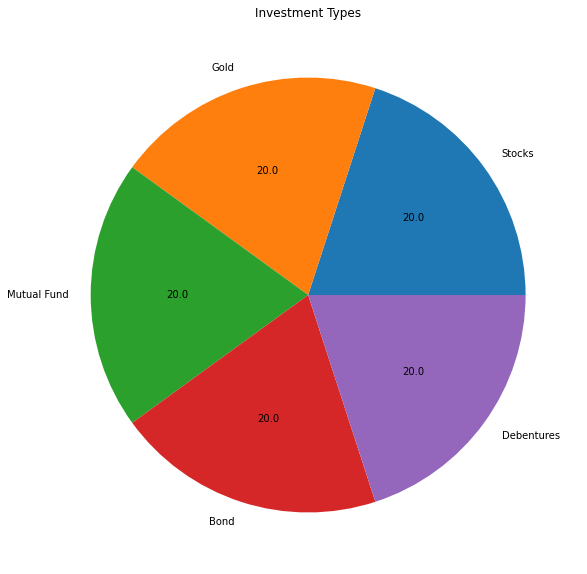

In [52]:
# defining figure size
plt.figure(figsize=(10,10))

# Visualize the Investment type column through pie plot
plt.pie(new_data['INVESTMENT TYPE'].value_counts(),autopct='%.1f',labels=['Stocks','Gold','Mutual Fund','Bond','Debentures'])
plt.title('Investment Types')
plt.show()

INFERENCE - From the above graph, we can infer that every investment type is equally present in the data set.

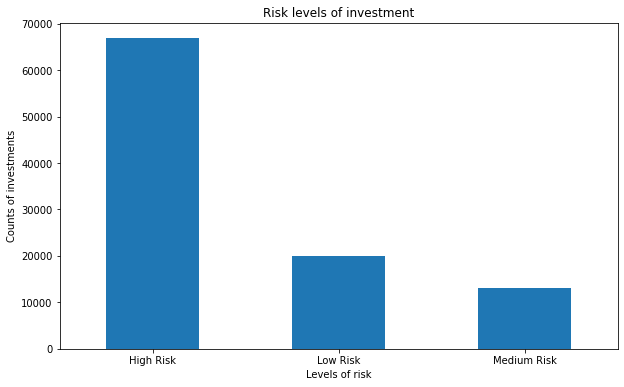

In [53]:
plt.figure(figsize = (10,6))
new_data['RISK LEVEL'].value_counts().plot(kind='bar',rot=0)
plt.title('Risk levels of investment')
plt.xlabel('Levels of risk')
plt.ylabel('Counts of investments')
plt.show()

INFERENCE - Most of the investments are done by taking high risk when compared to low and medium risk. 

#### 2. Numerical Columns

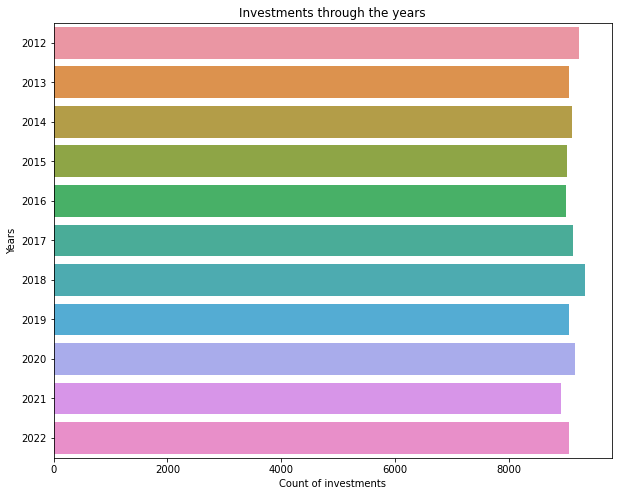

In [54]:
plt.figure(figsize=(10,8))
sns.countplot(y=new_data['YEAR'])
plt.title('Investments through the years')
plt.xlabel('Count of investments')
plt.ylabel('Years')
plt.show()

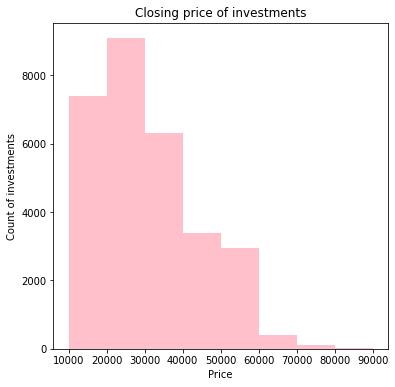

In [55]:
plt.figure(figsize=(6,6))
bins=np.arange(10000,100000,10000)
plt.hist(new_data['PRICE'],bins=bins,color='pink')
plt.xlabel('Price')
plt.ylabel('Count of investments')
plt.title('Closing price of investments')
plt.show()

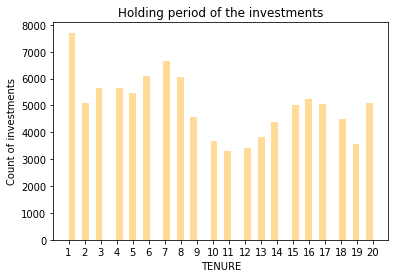

In [56]:
bins=np.arange(1,21,1)
sns.distplot(new_data['TENURE'],kde=False,color='orange')
plt.xticks(bins)
plt.title('Holding period of the investments')
plt.ylabel('Count of investments')
plt.show()

INFERENCE - Most of the investments are holded for 1 year and 7 years

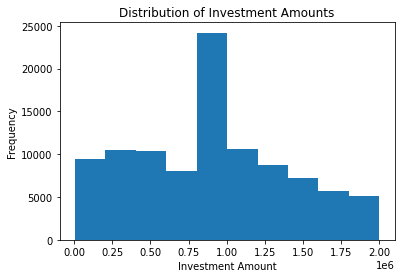

In [57]:
plt.hist(new_data['INVESTMENT AMOUNT'], bins=10, range=(5000, 2000000))
plt.xlabel('Investment Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Investment Amounts')
plt.show()

INFERENCE - 

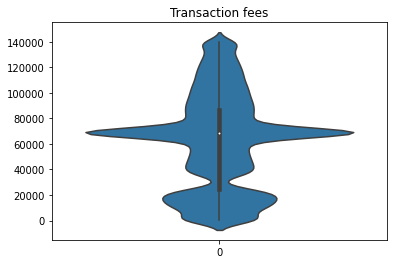

In [58]:
sns.violinplot(new_data['TRANSACTION FEES'])
plt.title('Transaction fees')
plt.show()

INFERENCE - 

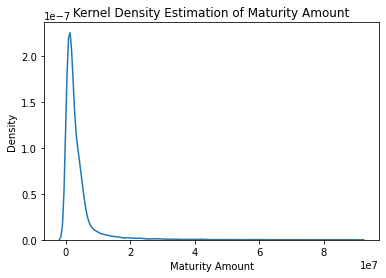

In [59]:
# KDE plot
sns.kdeplot(data=new_data, x='MATURITY AMOUNT')
plt.xlabel('Maturity Amount')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Maturity Amount')
plt.show()

INFERENCE - As we can see from the graph that maturity amount is highly skewed.

#### BIVARIATE ANALYSIS 

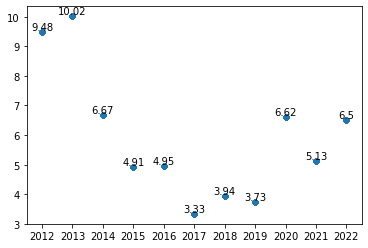

In [60]:
years=new_data['YEAR'].unique()
u=new_data['INFLATION RATE'].unique()
plt.scatter(y=new_data['INFLATION RATE'],x=new_data['YEAR'],s=20)
for i in range(len(years)):
    plt.text(years[i], u[i], str(u[i]), ha='center', va='bottom')
plt.xticks(years)
plt.show()

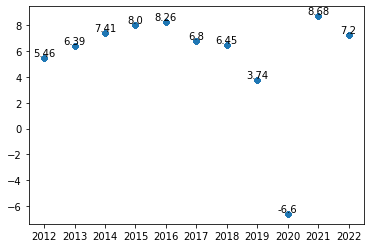

In [61]:
years=new_data['YEAR'].unique()
u=new_data['GDP RATE'].unique()

plt.scatter(y=new_data['GDP RATE'],x=new_data['YEAR'],s=20)
for i in range(len(years)):
    plt.text(years[i], u[i], str(u[i]), ha='center', va='bottom')
plt.xticks(years)
plt.show()

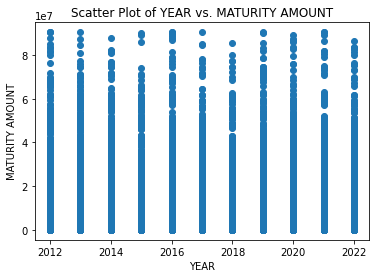

In [62]:
plt.scatter(new_data['YEAR'], new_data['MATURITY AMOUNT'])
plt.xlabel('YEAR')
plt.ylabel('MATURITY AMOUNT')
plt.title('Scatter Plot of YEAR vs. MATURITY AMOUNT')
plt.show()

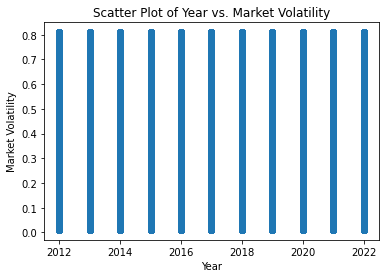

In [63]:
plt.scatter(new_data['YEAR'], new_data['MARKET VOLATILITY'])
plt.xlabel('Year')
plt.ylabel('Market Volatility')
plt.title('Scatter Plot of Year vs. Market Volatility')
plt.show()

#### MULTIVARIATE ANALYSIS 

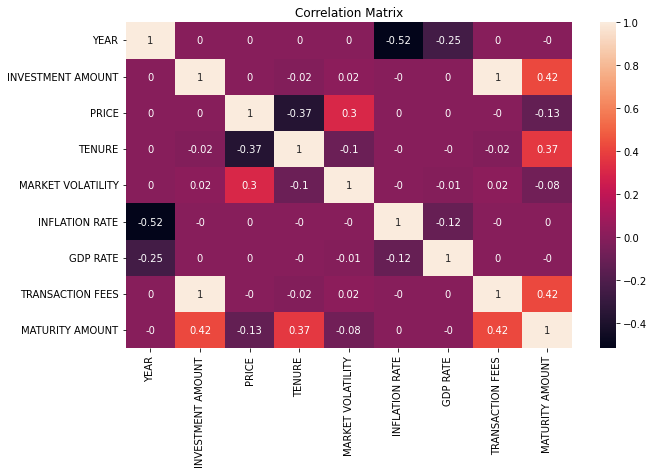

In [64]:
numeric_columns = new_data.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 6))
sns.heatmap(round(numeric_columns.corr(), 2), annot=True)
plt.title('Correlation Matrix')
plt.show()

Inferences for each column based on the correlation matrix:

- YEAR: There is a very weak positive correlation between the "Year" and other variables in the dataset.
- INVESTMENT AMOUNT: There is a positive correlation between the "Investment Amount" and "Maturity Amount" variables, indicating that higher investment amounts are associated with higher maturity amounts.
- PRICE: There is a negative correlation between the "Price" and "Maturity Amount" variables, suggesting that higher prices are associated with lower maturity amounts.
- TENURE: There is a positive correlation between the "Tenure" and "Maturity Amount" variables, indicating that longer tenures are associated with higher maturity amounts.
- TRANSACTION FEES: There is a negative correlation between the "Transaction Fees" and "Maturity Amount" variables, suggesting that higher transaction fees are associated with lower maturity amounts.
- MARKET VOLATILITY: There is a negative correlation between the "Market Volatility" and "Maturity Amount" variables, indicating that higher market volatility is associated with lower maturity amounts.
- INFLATION RATE: There is a negative correlation between the "Inflation Rate" and "Maturity Amount" variables, suggesting that higher inflation rates are associated with lower maturity amounts.
- GDP RATE: There is a very weak negative correlation between the "GDP Rate" and other variables in the dataset.
- MATURITY AMOUNT: The "Maturity Amount" is positively correlated with the "Investment Amount", "Tenure", and negatively correlated with the "Price", "Transaction Fees", "Market Volatility", and "Inflation Rate" variables.

#### DESCRIPTIVE STATISTICS 

In [65]:
new_data.describe()

,YEAR,INVESTMENT AMOUNT,PRICE,TENURE,MARKET VOLATILITY,INFLATION RATE,GDP RATE,TRANSACTION FEES,MATURITY AMOUNT
count,99996.000000,9.999600e+04,99996.000000,99996.000000,99996.000000,99996.000000,99996.00000,99996.000000,9.999600e+04
mean,2016.991170,9.118244e+05,10310.280286,9.786291,0.353979,5.936408,5.60064,62486.904735,3.808142e+06
std,3.160679,5.055133e+05,15143.381997,5.931033,0.188573,2.111971,4.09082,36981.982121,6.664150e+06
min,2012.000000,9.382000e+03,9.280000,1.000000,0.010000,3.330000,-6.60000,93.820000,1.022251e+04
25%,2014.000000,4.945320e+05,73.000000,5.000000,0.190000,3.940000,5.46000,24726.600000,9.575266e+05
50%,2017.000000,9.751285e+05,1004.000000,9.000000,0.340000,5.130000,6.80000,68258.995000,2.016355e+06
75%,2020.000000,1.239805e+06,12323.610000,15.000000,0.500000,6.670000,8.00000,86786.350000,4.072040e+06
max,2022.000000,2.000000e+06,93558.000000,20.000000,0.810000,10.020000,8.68000,140000.000000,9.037852e+07


INFERENCES -

- YEAR: The dataset contains records from the years 2012 to 2022, with a mean year of approximately 2017. This indicates that the data spans a period of 10 years.

- INVESTMENT AMOUNT: The average investment amount is around 911,867, with a standard deviation of 505,549. The minimum investment amount is 9,382, and the maximum is 2,000,000. The data is positively skewed, with the median (50th percentile) investment amount being 975,129. This suggests that the majority of investments fall within the lower to mid-range.

- PRICE: The average price is approximately 10,310, with a standard deviation of 15,143. The minimum price is 9.28, and the maximum is 93,558. The data is positively skewed, with the median price being 1,003.

- TENURE: The average tenure is around 9.79, with a standard deviation of 5.93. The minimum tenure is 1, and the maximum is 20. The data appears to be positively skewed, with the median tenure being 9.

- TRANSACTION FEES: The average transaction fees amount is approximately 17,954, with a standard deviation of 18,559. The minimum transaction fees are 175.149, and the maximum is 79,603.6. The data is positively skewed, with the median transaction fees being 11,822.55.

- MARKET VOLATILITY: The average market volatility is around 0.35, with a standard deviation of 0.19. The minimum market volatility is 0.01, and the maximum is 0.81. The data appears to be normally distributed, with the median market volatility being 0.34.

- INFLATION RATE: The average inflation rate is approximately 5.94, with a standard deviation of 2.11. The minimum inflation rate is 3.33, and the maximum is 10.02. The data appears to be normally distributed, with the median inflation rate being 5.13.

- GDP RATE: The average GDP rate is around 5.60, with a standard deviation of 4.09. The minimum GDP rate is -6.60, indicating a possible contraction in the economy, and the maximum is 8.68. The data appears to be normally distributed, with the median GDP rate being 6.80.

- MATURITY AMOUNT: The average maturity amount is approximately 3,806,853, with a standard deviation of 6,663,877. The minimum maturity amount is 10,224.95, and the maximum is 90,378,520. The data is positively skewed, with the median maturity amount being 2,018,615. This indicates that the majority of maturity amounts fall within the lower to mid-range.

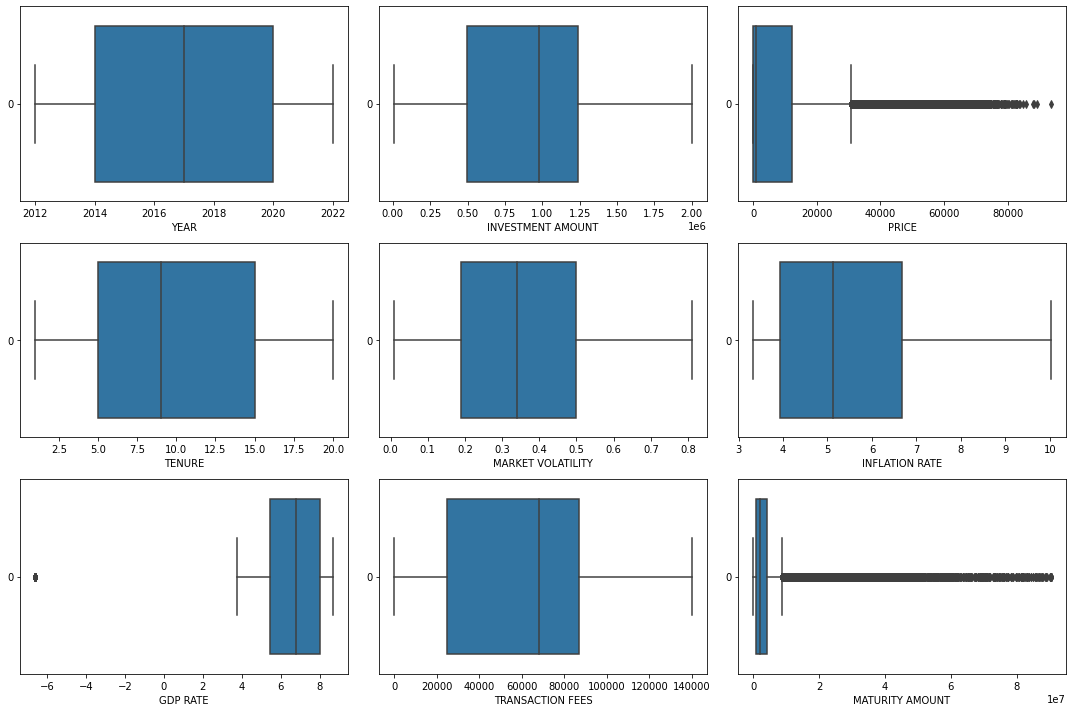

In [66]:
# Detection Of Outliers in datasets 
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
for i, j in zip(Num_col.columns, ax.flatten()):
    sns.boxplot(new_data[i], ax=j, orient='h')  # Set orient to 'h' for horizontal boxplots
    j.set_xlabel(i)  # Set x-label
    j.set_ylabel("")  # Remove y-label to save space
plt.tight_layout()  # Adjust the layout to prevent overlapping labels
plt.show()

From above we can infer that Price,GDP,Maturity amount has outliers. When it comes to price and maturity amount columns, qualitatively we can see that they are outliers, but when the outliers are more than 45-50%, subjectively it is not termed as a outlier. If we try to treat them, it will effect the quality of our data and we will be compromising on them.

We will treat the transaction fees column since treatment of outliers is possible.
While it comes to GDP rate, since this is the original data, and it will effect our model, so we wont be treating it. 


Outliers needs to be far and few. These are not outliers, the box plot shows it is outlier since it has few limitations like to stop at 1.5 * IQR.

sns.boxplot(merged_data['TRANSACTION FEES'])
plt.show()

In [69]:
# Calculate the minimum and maximum values for numerical features
numerical_columns = ['YEAR', 'INVESTMENT AMOUNT', 'PRICE', 'TENURE', 'TRANSACTION FEES', 'MARKET VOLATILITY', 'INFLATION RATE', 'GDP RATE', 'MATURITY AMOUNT']
column_ranges = new_data[numerical_columns].agg(['min', 'max'])

# Display the range of values for each numerical feature
print(column_ranges)

     YEAR  INVESTMENT AMOUNT     PRICE  TENURE  TRANSACTION FEES  \
min  2012               9382      9.28       1             93.82   
max  2022            2000000  93558.00      20         140000.00   

     MARKET VOLATILITY  INFLATION RATE  GDP RATE  MATURITY AMOUNT  
min               0.01            3.33     -6.60         10222.51  
max               0.81           10.02      8.68      90378524.26  


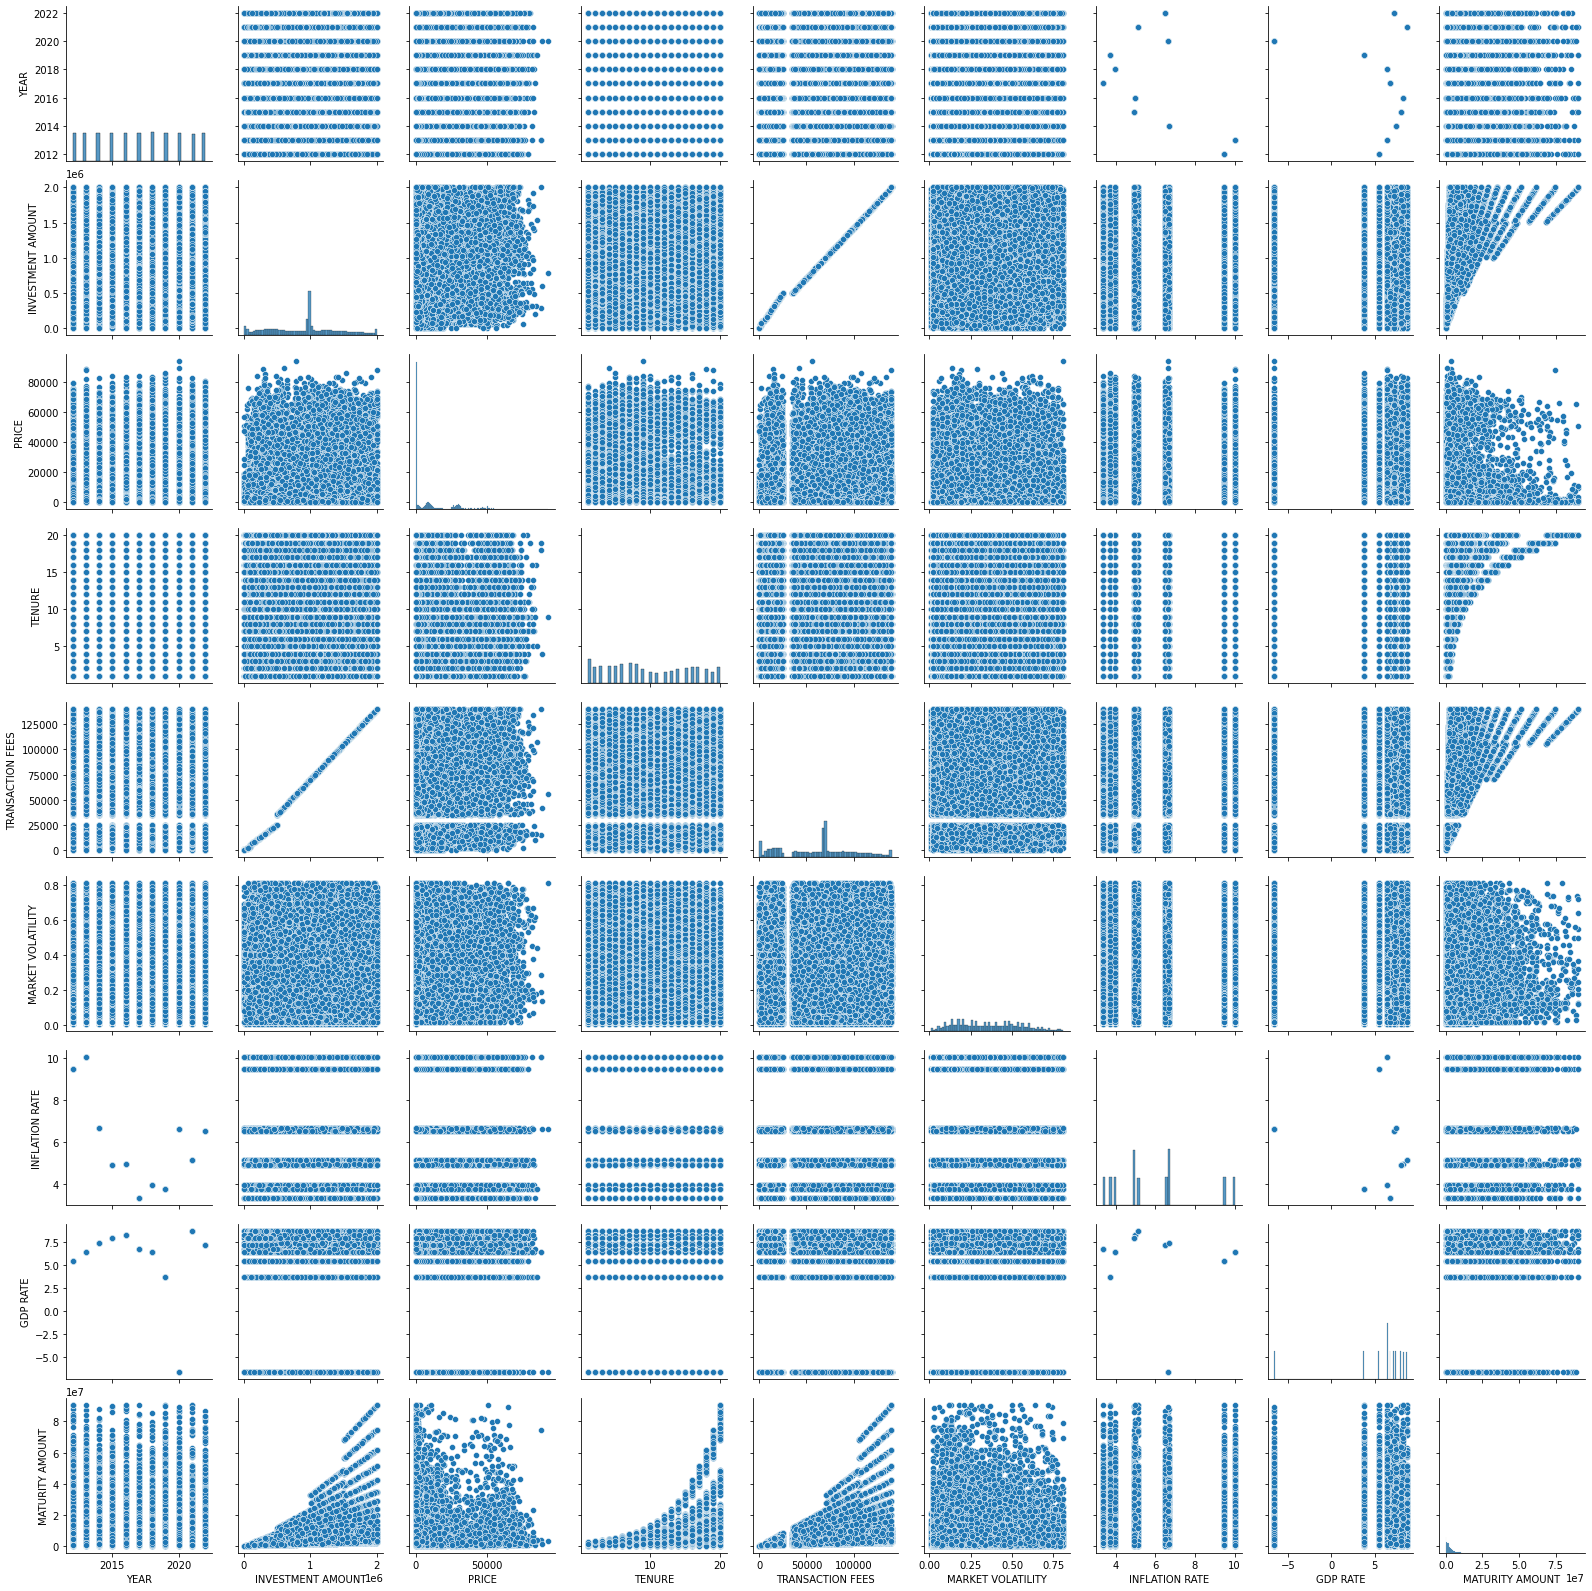

In [70]:
# Create a pairplot with only the lower triangle shown
sns.pairplot(new_data[numerical_columns])

# Show the plot
plt.show()

In [ ]:
# 1. scaling is important for every numerical column

In [ ]:
# 2. encode - one hot encoding - investment type 
# 3. encode - label encoding - 1,2,3 - high risk, medium risk, low risk 

In [ ]:
# 4. check the distribution - transformation - you do this to bring the data to normal distribution , for the columns which has skewness  - Log transformation -  (for gdp rate column - check with chat gpt - what kind of transformation will be used for negative values)

In [ ]:
#after creating a base model, we will do the feature engineering (domain knowledge is important) we have a method where we can add extra columns to improve the accuracy 

In [ ]:
#we need to check the accuracy and it should be 90% 

In [71]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99996 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   INVESTMENT TYPE    99996 non-null  object 
 1   YEAR               99996 non-null  int32  
 2   INVESTMENT AMOUNT  99996 non-null  int64  
 3   PRICE              99996 non-null  float64
 4   TENURE             99996 non-null  int64  
 5   MARKET VOLATILITY  99996 non-null  float64
 6   INFLATION RATE     99996 non-null  float64
 7   GDP RATE           99996 non-null  float64
 8   TRANSACTION FEES   99996 non-null  float64
 9   RISK LEVEL         99996 non-null  object 
 10  MATURITY AMOUNT    99996 non-null  float64
dtypes: float64(6), int32(1), int64(2), object(2)
memory usage: 10.8+ MB


In [72]:
new_data.to_csv('eda_data.csv', index=False)

### SCALING THE NUMERICAL COLUMNS 


- **Normalization of Data:** Scaling brings all numerical features within a common range, typically between 0 and 1.
- **Improved Convergence:** Scaling helps algorithms converge faster during the training process.
- **Equivalence of Units:** Scaling makes features with different units comparable in importance.
- **Distance-Based Algorithms:** Scaling ensures distance-based algorithms work accurately.
- **Regularization Techniques:** Some regularization methods assume all features have the same scale.
- **Gradient Descent:** Scaling helps gradient descent converge faster and more accurately.
- **Model Interpretability:** Scaling preserves the significance and direction of feature effects on the target.

In [73]:
merged_data = pd.read_csv('eda_data.csv')

In [74]:
merged_data

,INVESTMENT TYPE,YEAR,INVESTMENT AMOUNT,PRICE,TENURE,MARKET VOLATILITY,INFLATION RATE,GDP RATE,TRANSACTION FEES,RISK LEVEL,MATURITY AMOUNT
0,Bond,2014,790002,11694.43,9,0.28,6.67,7.41,55300.14,High Risk,1278980.14
1,Bond,2019,391094,12380.75,7,0.48,3.73,3.74,19554.70,High Risk,523301.01
2,Bond,2015,1460404,7238.14,14,0.24,4.91,8.00,102228.28,High Risk,3668097.67
3,Bond,2013,853965,6621.14,3,0.21,10.02,6.39,59777.55,High Risk,1014366.24
4,Bond,2021,9923,18409.36,13,0.21,5.13,8.68,99.23,High Risk,16386.74
...,...,...,...,...,...,...,...,...,...,...,...
99991,Stocks,2013,314121,1121.00,6,0.27,10.02,6.39,15706.05,High Risk,726580.96
99992,Stocks,2019,1273206,73.00,4,0.31,3.73,3.74,89124.42,High Risk,2553209.91
99993,Stocks,2015,1899471,8435.00,20,0.18,4.91,8.00,132962.97,High Risk,85968643.43
99994,Stocks,2015,1996907,4063.00,2,0.16,4.91,8.00,139783.49,High Risk,2923671.54


In [75]:
#we are not taking target variable while scaling

from sklearn.preprocessing import MinMaxScaler

# List of numerical columns to be scaled
numerical_columns = ['YEAR', 'INVESTMENT AMOUNT', 'PRICE', 'TENURE', 'TRANSACTION FEES',
                     'MARKET VOLATILITY', 'INFLATION RATE', 'GDP RATE']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
merged_data[numerical_columns] = scaler.fit_transform(merged_data[numerical_columns])

In [76]:
merged_data.head()

,INVESTMENT TYPE,YEAR,INVESTMENT AMOUNT,PRICE,TENURE,MARKET VOLATILITY,INFLATION RATE,GDP RATE,TRANSACTION FEES,RISK LEVEL,MATURITY AMOUNT
0,Bond,0.2,0.392150,0.124910,0.421053,0.3375,0.499253,0.916885,0.394595,High Risk,1278980.14
1,Bond,0.7,0.191756,0.132246,0.315789,0.5875,0.059791,0.676702,0.139100,High Risk,523301.01
2,Bond,0.3,0.728930,0.077274,0.684211,0.2875,0.236173,0.955497,0.730021,High Risk,3668097.67
3,Bond,0.1,0.424282,0.070678,0.105263,0.2500,1.000000,0.850131,0.426598,High Risk,1014366.24
4,Bond,0.9,0.000272,0.196690,0.631579,0.2500,0.269058,1.000000,0.000039,High Risk,16386.74


In [77]:
merged_data.describe()

,YEAR,INVESTMENT AMOUNT,PRICE,TENURE,MARKET VOLATILITY,INFLATION RATE,GDP RATE,TRANSACTION FEES,MATURITY AMOUNT
count,99996.000000,99996.000000,99996.000000,99996.000000,99996.000000,99996.000000,99996.000000,99996.000000,9.999600e+04
mean,0.499117,0.453348,0.110114,0.462436,0.429974,0.389598,0.798471,0.445964,3.808142e+06
std,0.316068,0.253948,0.161877,0.312160,0.235716,0.315691,0.267724,0.264334,6.664150e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.022251e+04
25%,0.200000,0.243718,0.000681,0.210526,0.225000,0.091181,0.789267,0.176066,9.575266e+05
50%,0.500000,0.485149,0.010633,0.421053,0.412500,0.269058,0.876963,0.487221,2.016355e+06
75%,0.800000,0.618111,0.131635,0.736842,0.612500,0.499253,0.955497,0.619648,4.072040e+06
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.037852e+07


### ENCODING THE INVESTMENT TYPE COLUMN

 One-hot encoding is a technique used to convert categorical data into a format that can be provided to machine learning algorithms to improve model performance.

In [78]:
merged_data = pd.get_dummies(merged_data, columns=['INVESTMENT TYPE'])

In [79]:
merged_data.head()

,YEAR,INVESTMENT AMOUNT,PRICE,TENURE,MARKET VOLATILITY,INFLATION RATE,GDP RATE,TRANSACTION FEES,RISK LEVEL,MATURITY AMOUNT,INVESTMENT TYPE_Bond,INVESTMENT TYPE_Debentures,INVESTMENT TYPE_Gold,INVESTMENT TYPE_Mutual Fund,INVESTMENT TYPE_Stocks
0,0.2,0.392150,0.124910,0.421053,0.3375,0.499253,0.916885,0.394595,High Risk,1278980.14,True,False,False,False,False
1,0.7,0.191756,0.132246,0.315789,0.5875,0.059791,0.676702,0.139100,High Risk,523301.01,True,False,False,False,False
2,0.3,0.728930,0.077274,0.684211,0.2875,0.236173,0.955497,0.730021,High Risk,3668097.67,True,False,False,False,False
3,0.1,0.424282,0.070678,0.105263,0.2500,1.000000,0.850131,0.426598,High Risk,1014366.24,True,False,False,False,False
4,0.9,0.000272,0.196690,0.631579,0.2500,0.269058,1.000000,0.000039,High Risk,16386.74,True,False,False,False,False


In [80]:
# Convert True to 1 and False to 0 for the investment type columns
investment_type_columns = ['INVESTMENT TYPE_Bond','INVESTMENT TYPE_Debentures', 'INVESTMENT TYPE_Gold', 'INVESTMENT TYPE_Mutual Fund', 'INVESTMENT TYPE_Stocks']
merged_data[investment_type_columns] = merged_data[investment_type_columns].astype(int)

In [81]:
merged_data.head()

,YEAR,INVESTMENT AMOUNT,PRICE,TENURE,MARKET VOLATILITY,INFLATION RATE,GDP RATE,TRANSACTION FEES,RISK LEVEL,MATURITY AMOUNT,INVESTMENT TYPE_Bond,INVESTMENT TYPE_Debentures,INVESTMENT TYPE_Gold,INVESTMENT TYPE_Mutual Fund,INVESTMENT TYPE_Stocks
0,0.2,0.392150,0.124910,0.421053,0.3375,0.499253,0.916885,0.394595,High Risk,1278980.14,1,0,0,0,0
1,0.7,0.191756,0.132246,0.315789,0.5875,0.059791,0.676702,0.139100,High Risk,523301.01,1,0,0,0,0
2,0.3,0.728930,0.077274,0.684211,0.2875,0.236173,0.955497,0.730021,High Risk,3668097.67,1,0,0,0,0
3,0.1,0.424282,0.070678,0.105263,0.2500,1.000000,0.850131,0.426598,High Risk,1014366.24,1,0,0,0,0
4,0.9,0.000272,0.196690,0.631579,0.2500,0.269058,1.000000,0.000039,High Risk,16386.74,1,0,0,0,0


In [82]:
unique_types = merged_data['RISK LEVEL'].unique()
print(unique_types)

['High Risk' 'Medium Risk' 'Low Risk']


### LABEL ENCODING 

0 - Low risk

1 - Medium Risk

2 - High risk 

In [83]:
# Define a mapping dictionary
risk_mapping = {'Low Risk': 0, 'Medium Risk': 1, 'High Risk': 2}

# Use the map function to replace values in the 'RISK COLUMN' column
merged_data['RISK LEVEL'] = merged_data['RISK LEVEL'].map(risk_mapping)

In [84]:
merged_data.head()

,YEAR,INVESTMENT AMOUNT,PRICE,TENURE,MARKET VOLATILITY,INFLATION RATE,GDP RATE,TRANSACTION FEES,RISK LEVEL,MATURITY AMOUNT,INVESTMENT TYPE_Bond,INVESTMENT TYPE_Debentures,INVESTMENT TYPE_Gold,INVESTMENT TYPE_Mutual Fund,INVESTMENT TYPE_Stocks
0,0.2,0.392150,0.124910,0.421053,0.3375,0.499253,0.916885,0.394595,2,1278980.14,1,0,0,0,0
1,0.7,0.191756,0.132246,0.315789,0.5875,0.059791,0.676702,0.139100,2,523301.01,1,0,0,0,0
2,0.3,0.728930,0.077274,0.684211,0.2875,0.236173,0.955497,0.730021,2,3668097.67,1,0,0,0,0
3,0.1,0.424282,0.070678,0.105263,0.2500,1.000000,0.850131,0.426598,2,1014366.24,1,0,0,0,0
4,0.9,0.000272,0.196690,0.631579,0.2500,0.269058,1.000000,0.000039,2,16386.74,1,0,0,0,0


In [85]:
merged_data.to_csv('scaled_encoded_data.csv', index=False)

## DISTRIBUTION 

In [86]:
new_data = pd.read_csv('scaled_encoded_data.csv')

In [87]:
# List of numerical columns
numerical_columns = ['YEAR', 'INVESTMENT AMOUNT', 'PRICE', 'TENURE', 'TRANSACTION FEES', 'MARKET VOLATILITY', 'INFLATION RATE', 'GDP RATE', 'MATURITY AMOUNT']

# Check skewness of numerical columns
skewness = new_data[numerical_columns].skew()
skewness

YEAR                -0.000919
INVESTMENT AMOUNT    0.124662
PRICE                1.562188
TENURE               0.167404
TRANSACTION FEES     0.061207
MARKET VOLATILITY    0.243231
INFLATION RATE       0.720633
GDP RATE            -2.340785
MATURITY AMOUNT      5.708985
dtype: float64

In [88]:
high_skew_cols = skewness[skewness.abs() > 0.5].index
high_skew_cols

Index(['PRICE', 'INFLATION RATE', 'GDP RATE', 'MATURITY AMOUNT'], dtype='object')

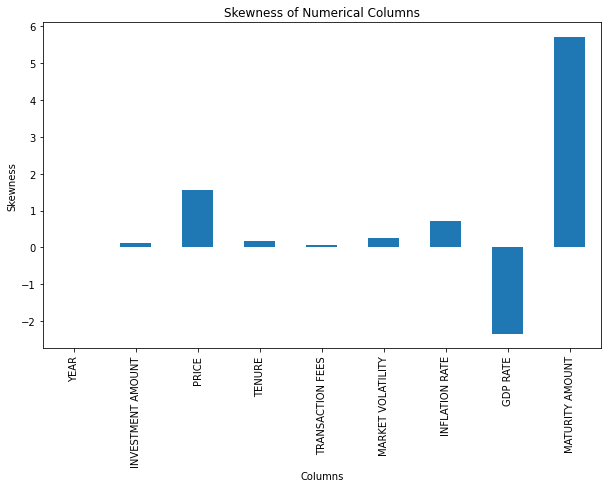

In [89]:
# Plot skewness using a bar plot
plt.figure(figsize=(10, 6))
skewness.plot(kind='bar')
plt.title('Skewness of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.show()

## TRANSFORMATION

Normality is one of the assumptions of linear regression, and violating this assumption can impact the reliability and accuracy of the model's predictions.

In [90]:
import pandas as pd
from scipy import stats


# Extract the column you want to transform
column_to_transform = new_data['MATURITY AMOUNT']

# Perform a Box-Cox transformation on the selected column
transformed_column, lambda_bestfit = stats.boxcox(column_to_transform)

# Replace the original column in the DataFrame with the transformed column
new_data['MATURITY AMOUNT1'] = transformed_column

new_data

,YEAR,INVESTMENT AMOUNT,PRICE,TENURE,MARKET VOLATILITY,INFLATION RATE,GDP RATE,TRANSACTION FEES,RISK LEVEL,MATURITY AMOUNT,INVESTMENT TYPE_Bond,INVESTMENT TYPE_Debentures,INVESTMENT TYPE_Gold,INVESTMENT TYPE_Mutual Fund,INVESTMENT TYPE_Stocks,MATURITY AMOUNT1
0,0.2,0.392150,0.124910,0.421053,0.3375,0.499253,0.916885,0.394595,2,1278980.14,1,0,0,0,0,48.546429
1,0.7,0.191756,0.132246,0.315789,0.5875,0.059791,0.676702,0.139100,2,523301.01,1,0,0,0,0,41.597617
2,0.3,0.728930,0.077274,0.684211,0.2875,0.236173,0.955497,0.730021,2,3668097.67,1,0,0,0,0,58.035452
3,0.1,0.424282,0.070678,0.105263,0.2500,1.000000,0.850131,0.426598,2,1014366.24,1,0,0,0,0,46.653273
4,0.9,0.000272,0.196690,0.631579,0.2500,0.269058,1.000000,0.000039,2,16386.74,1,0,0,0,0,21.992289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,0.1,0.153088,0.011884,0.263158,0.3250,1.000000,0.850131,0.111591,2,726580.96,0,0,0,0,1,44.041568
99992,0.7,0.634890,0.000681,0.157895,0.3750,0.059791,0.676702,0.636359,2,2553209.91,0,0,0,0,1,54.601140
99993,0.3,0.949499,0.090068,1.000000,0.2125,0.236173,0.955497,0.949702,2,85968643.43,0,0,0,0,1,97.360164
99994,0.3,0.998446,0.043333,0.052632,0.1875,0.236173,0.955497,0.998452,2,2923671.54,0,0,0,0,1,55.863506


In [91]:
new_data.skew()

YEAR                          -0.000919
INVESTMENT AMOUNT              0.124662
PRICE                          1.562188
TENURE                         0.167404
MARKET VOLATILITY              0.243231
INFLATION RATE                 0.720633
GDP RATE                      -2.340785
TRANSACTION FEES               0.061207
RISK LEVEL                    -1.046730
MATURITY AMOUNT                5.708985
INVESTMENT TYPE_Bond           1.499960
INVESTMENT TYPE_Debentures     1.499960
INVESTMENT TYPE_Gold           1.499960
INVESTMENT TYPE_Mutual Fund    1.500038
INVESTMENT TYPE_Stocks         1.500194
MATURITY AMOUNT1               0.075048
dtype: float64

In [92]:
new_data.to_csv('final_data.csv', index=False)

## BASIC MODEL BUILDING 

we should not include the target variable ('MATURITY AMOUNT') in the training and testing datasets. The target variable is what we want to predict, and it should be kept separate from the features used to train the model

In [93]:
df = pd.read_csv('final_data.csv')

In [94]:
df.head()

,YEAR,INVESTMENT AMOUNT,PRICE,TENURE,MARKET VOLATILITY,INFLATION RATE,GDP RATE,TRANSACTION FEES,RISK LEVEL,MATURITY AMOUNT,INVESTMENT TYPE_Bond,INVESTMENT TYPE_Debentures,INVESTMENT TYPE_Gold,INVESTMENT TYPE_Mutual Fund,INVESTMENT TYPE_Stocks,MATURITY AMOUNT1
0,0.2,0.392150,0.124910,0.421053,0.3375,0.499253,0.916885,0.394595,2,1278980.14,1,0,0,0,0,48.546429
1,0.7,0.191756,0.132246,0.315789,0.5875,0.059791,0.676702,0.139100,2,523301.01,1,0,0,0,0,41.597617
2,0.3,0.728930,0.077274,0.684211,0.2875,0.236173,0.955497,0.730021,2,3668097.67,1,0,0,0,0,58.035452
3,0.1,0.424282,0.070678,0.105263,0.2500,1.000000,0.850131,0.426598,2,1014366.24,1,0,0,0,0,46.653273
4,0.9,0.000272,0.196690,0.631579,0.2500,0.269058,1.000000,0.000039,2,16386.74,1,0,0,0,0,21.992289


In [95]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
#importing train test split
from sklearn.model_selection import train_test_split

In [96]:
# Independent variables
X = df.drop(['MATURITY AMOUNT', 'MATURITY AMOUNT1'], axis=1)  # Drop the target column

# Add a constant to the independent variables matrix
X = sm.add_constant(X)

# Dependent variable
y = df['MATURITY AMOUNT1']

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.30)

In [97]:
basic_model = sm.OLS(y_train, X_train).fit()

In [98]:
print(basic_model.summary())

                            OLS Regression Results                            
Dep. Variable:       MATURITY AMOUNT1   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                 3.570e+04
Date:                Thu, 14 Sep 2023   Prob (F-statistic):               0.00
Time:                        15:53:55   Log-Likelihood:            -1.9861e+05
No. Observations:               69997   AIC:                         3.972e+05
Df Residuals:                   69983   BIC:                         3.974e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

## Linear Regression Line

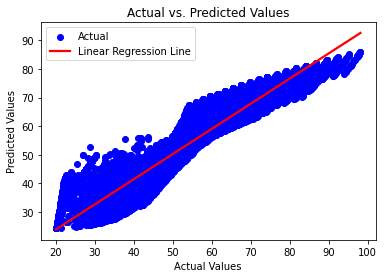

In [99]:
# Predict values using the basic_model
predict = basic_model.predict(X_test)

# Plot the scatter plot and regression line
plt.scatter(y_test, predict, color='blue', label='Actual')
sns.regplot(x=y_test, y=predict, scatter=False, line_kws={'color': 'red'}, label='Linear Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

# LINEAR EQUATION 

In [100]:
coefficients = basic_model.params
intercept = coefficients['const']

# Print the equation
equation = f"Dependent_Variable = {intercept:.4f} + "
for idx, coef in coefficients.items():
    if idx != 'const':
        equation += f"{coef:.4f} * {idx} + "
equation = equation[:-2]  # Remove the last "+"
print("Linear Regression Equation:")
print(equation)

Linear Regression Equation:
Dependent_Variable = 26.8578 + -0.1593 * YEAR + 55.0448 * INVESTMENT AMOUNT + 0.1021 * PRICE + 18.4878 * TENURE + -0.3275 * MARKET VOLATILITY + -0.0746 * INFLATION RATE + -0.1443 * GDP RATE + -23.8189 * TRANSACTION FEES + -1.5281 * RISK LEVEL + 1.0341 * INVESTMENT TYPE_Bond + 5.0615 * INVESTMENT TYPE_Debentures + 1.6996 * INVESTMENT TYPE_Gold + 6.2650 * INVESTMENT TYPE_Mutual Fund + 12.7975 * INVESTMENT TYPE_Stocks 


In [101]:
ypredict=basic_model.predict(X_test)

In [102]:
target_df = pd.DataFrame({"Actual Maturity Amount" :y_test, "Predicted Maturity Amount" : ypredict})
target_df.head()

,Actual Maturity Amount,Predicted Maturity Amount
64751,48.947771,49.044452
36526,57.859094,56.507029
9125,61.679554,60.606806
70596,45.662949,43.005242
72732,42.216820,39.081589


In [103]:
maturity_column = pd.read_csv("eda_data.csv")['MATURITY AMOUNT'].values
maturity_column

array([ 1278980.14,   523301.01,  3668097.67, ..., 85968643.43,
        2923671.54,  1796466.32])

#### EXAMPLE 1 

In [107]:
transformed_data, lambda_value = stats.boxcox(maturity_column +1)

predict_value = (49.044452* lambda_value + 1) ** (1 / lambda_value)
predict_value

1357768.8748517644

In [106]:
transformed_data, lambda_value = stats.boxcox(maturity_column +1)

actual_value = (48.947771* lambda_value + 1) ** (1 / lambda_value)
actual_value

1342190.8596863893

#### EXAMPLE 2

In [108]:
transformed_data, lambda_value = stats.boxcox(maturity_column +1)

predict_value = (56.507029* lambda_value + 1) ** (1 / lambda_value)
predict_value

3129875.486270222

In [109]:
transformed_data, lambda_value = stats.boxcox(maturity_column +1)

actual_value = (57.859094* lambda_value + 1) ** (1 / lambda_value)
actual_value

3602673.9948926577

#### EXAMPLE 3

In [111]:
transformed_data, lambda_value = stats.boxcox(maturity_column +1)

predict_value = (60.606806* lambda_value + 1) ** (1 / lambda_value)
predict_value

4752687.852897699

In [110]:
transformed_data, lambda_value = stats.boxcox(maturity_column +1)

actual_value = (61.679554* lambda_value + 1) ** (1 / lambda_value)
actual_value

5279373.6616413575

#### EXAMPLE 4

In [113]:
transformed_data, lambda_value = stats.boxcox(maturity_column +1)

predict_value = (43.005242* lambda_value + 1) ** (1 / lambda_value)
predict_value

633507.6215953083

In [112]:
transformed_data, lambda_value = stats.boxcox(maturity_column +1)

actual_value = (45.662949* lambda_value + 1) ** (1 / lambda_value)
actual_value

895675.8504154509

## MODEL OPTIMIZATION 

### 1. MODEL COMPARISON

In [114]:
# Import Linear Regression model
from sklearn.linear_model import LinearRegression

# Import Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor

# Import Decision Tree Regressor model
from sklearn.tree import DecisionTreeRegressor

# Import Ada Boost Regressor model
from sklearn.ensemble import AdaBoostRegressor

# Import Gradient Boosting Regressor model
from sklearn.ensemble import GradientBoostingRegressor

In [115]:
lr  = LinearRegression()
rfr = RandomForestRegressor(n_estimators=100)
dtr = DecisionTreeRegressor()
abr = AdaBoostRegressor()
gbr = GradientBoostingRegressor()
regression_models = [lr,rfr,gbr,dtr,abr]
score_train = list()
score_test = list()

for model in regression_models : 
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    score_train.append(model.score(X_train,y_train))
    score_test.append(model.score(X_test,y_test))
model_names = ['Linear Regression','Random Forest Regressor','Gradient Boosting Regressor','Decision Tree Regressor','AdaBoostRegressor']

scores = pd.DataFrame([model_names,score_train,score_test])
scores

,0,1,2,3,4
0,Linear Regression,Random Forest Regressor,Gradient Boosting Regressor,Decision Tree Regressor,AdaBoostRegressor
1,0.868972,0.999442,0.993254,1.0,0.891368
2,0.87212,0.995891,0.993009,0.992444,0.889929


In [116]:
AdaBoostModel = AdaBoostRegressor().fit(X_train, y_train)

In [117]:
AdaBoostModel.score(X_test,y_test)

0.8997466461074478

### 2. POLYNOMIAL FEATURE

In [118]:
from sklearn.preprocessing import PolynomialFeatures

In [119]:
poly = PolynomialFeatures().fit_transform(X)

In [120]:
poly

array([[1. , 1. , 0.2, ..., 0. , 0. , 0. ],
       [1. , 1. , 0.7, ..., 0. , 0. , 0. ],
       [1. , 1. , 0.3, ..., 0. , 0. , 0. ],
       ...,
       [1. , 1. , 0.3, ..., 0. , 0. , 1. ],
       [1. , 1. , 0.3, ..., 0. , 0. , 1. ],
       [1. , 1. , 0.5, ..., 0. , 0. , 1. ]])

In [121]:
poly.shape

(99996, 136)

In [122]:
new_df = pd.DataFrame(poly,columns = ["column" + str(i) for i in range(1,137)])

In [123]:
new_df.head()

,column1,column2,column3,column4,column5,column6,column7,column8,column9,column10,...,column127,column128,column129,column130,column131,column132,column133,column134,column135,column136
0,1.0,1.0,0.2,0.392150,0.124910,0.421053,0.3375,0.499253,0.916885,0.394595,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.7,0.191756,0.132246,0.315789,0.5875,0.059791,0.676702,0.139100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.3,0.728930,0.077274,0.684211,0.2875,0.236173,0.955497,0.730021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.1,0.424282,0.070678,0.105263,0.2500,1.000000,0.850131,0.426598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.9,0.000272,0.196690,0.631579,0.2500,0.269058,1.000000,0.000039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## PCA - Principal Component Analysis

In [124]:
from sklearn.decomposition import PCA

# Create a PCA object
pca = PCA()

# Fit PCA on the standardized data
pca.fit(new_df)

PCA()

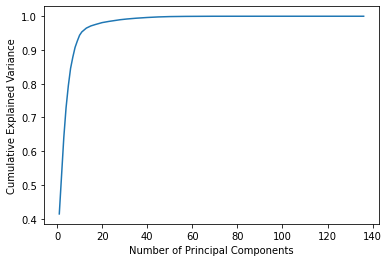

In [125]:
import matplotlib.pyplot as plt

# Plot explained variance ratio
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [126]:
np.cumsum(pca.explained_variance_ratio_) 
#there are total of 136 columns, which are contributing to the 100% of the variation, among them, only 8 columns are contributing to the 90% of the variation

array([0.41426962, 0.52895999, 0.64074098, 0.72877622, 0.79362184,
       0.84533484, 0.87888471, 0.90774282, 0.92673768, 0.94376718,
       0.95358162, 0.95943672, 0.96488926, 0.96820595, 0.97129708,
       0.97349137, 0.97547832, 0.977401  , 0.97929045, 0.98113437,
       0.98241156, 0.98360633, 0.98469618, 0.98575111, 0.98679149,
       0.98781278, 0.98875385, 0.98968603, 0.9904979 , 0.9911881 ,
       0.99184534, 0.99248062, 0.99305325, 0.99360822, 0.99411373,
       0.99460862, 0.99505943, 0.99550542, 0.99590887, 0.99630302,
       0.99668338, 0.99703672, 0.99737357, 0.99767846, 0.99798005,
       0.99824248, 0.99845324, 0.99866002, 0.99882891, 0.99897883,
       0.99910383, 0.99921171, 0.99930652, 0.99939547, 0.99945896,
       0.99951982, 0.99958003, 0.99963732, 0.99968627, 0.99972409,
       0.99976005, 0.99979136, 0.99981988, 0.99984741, 0.99987387,
       0.99989721, 0.99991695, 0.99993483, 0.99995247, 0.99996719,
       0.99997863, 0.99998649, 0.99999089, 0.99999404, 0.99999

In [130]:
# Choose the number of components
n_components = 8  # You can choose based on the cumulative explained variance plot

# Apply PCA transformation
pca_transformed = pca.transform(new_df)[:, :n_components]

In [131]:
pca_df = pd.DataFrame(pca_transformed)
pca_df.head()

,0,1,2,3,4,5,6,7
0,-1.590760,-1.200661,-2.164526,-0.146667,0.815190,0.333115,-0.392258,0.415653
1,-1.306400,-1.359963,-2.327393,-0.331622,-1.050453,-0.394990,0.134624,0.762653
2,-2.055219,-1.010056,-1.861926,-0.042539,0.118797,1.555423,-0.748686,-0.483361
3,-1.451488,-0.995889,-2.230549,0.020774,2.029984,0.468199,0.352466,1.145314
4,-1.609535,-1.689471,-2.380068,-0.357787,-1.068448,-1.054554,-0.342235,-0.029783


In [132]:
pca_df.columns = ['PC0','PC1','PC2','PC3','PC4','PC5','PC6','PC7']

pca_df.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-1.590760,-1.200661,-2.164526,-0.146667,0.815190,0.333115,-0.392258,0.415653
1,-1.306400,-1.359963,-2.327393,-0.331622,-1.050453,-0.394990,0.134624,0.762653
2,-2.055219,-1.010056,-1.861926,-0.042539,0.118797,1.555423,-0.748686,-0.483361
3,-1.451488,-0.995889,-2.230549,0.020774,2.029984,0.468199,0.352466,1.145314
4,-1.609535,-1.689471,-2.380068,-0.357787,-1.068448,-1.054554,-0.342235,-0.029783


In [133]:
corr = pca_df.corr()
corr

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7
PC0,1.000000e+00,1.582213e-16,3.166394e-16,-1.831069e-15,-1.611727e-15,-2.569323e-16,5.196141e-16,-2.888306e-16
PC1,1.582213e-16,1.000000e+00,2.229193e-15,1.810614e-15,-1.392880e-15,5.288031e-17,7.821774e-17,6.322792e-16
PC2,3.166394e-16,2.229193e-15,1.000000e+00,-5.083010e-16,2.086615e-16,-6.098302e-16,7.423603e-17,-2.683037e-16
PC3,-1.831069e-15,1.810614e-15,-5.083010e-16,1.000000e+00,-6.719737e-16,-5.448440e-16,-3.511256e-16,2.240721e-16
PC4,-1.611727e-15,-1.392880e-15,2.086615e-16,-6.719737e-16,1.000000e+00,-3.456414e-16,1.657762e-14,-1.299935e-15
PC5,-2.569323e-16,5.288031e-17,-6.098302e-16,-5.448440e-16,-3.456414e-16,1.000000e+00,3.465204e-16,-3.905169e-17
PC6,5.196141e-16,7.821774e-17,7.423603e-17,-3.511256e-16,1.657762e-14,3.465204e-16,1.000000e+00,2.285751e-17
PC7,-2.888306e-16,6.322792e-16,-2.683037e-16,2.240721e-16,-1.299935e-15,-3.905169e-17,2.285751e-17,1.000000e+00


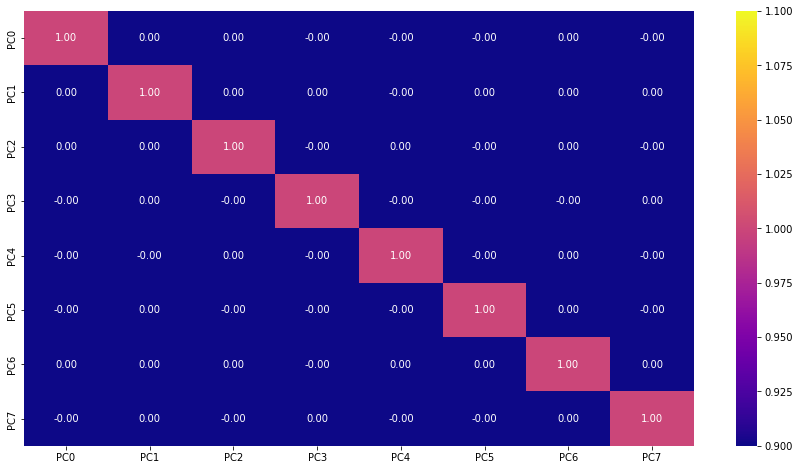

In [134]:
plt.figure(figsize = (15,8))
sns.heatmap(corr, annot = True, fmt = '.2f', cmap = 'plasma', vmin =1, vmax = 1)
plt.show()

In [135]:
# Independent variables
X = pca_df  # Drop the target column

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.30)

In [136]:
AdaBoostModel = AdaBoostRegressor().fit(X_train, y_train)

In [137]:
AdaBoostModel.score(X_test, y_test)

0.8816981307468006

## 3. FEATURE SELECTION

In [158]:
# Independent variables
X = df.drop(['MATURITY AMOUNT', 'MATURITY AMOUNT1','YEAR','PRICE','MARKET VOLATILITY','INFLATION RATE','GDP RATE','TRANSACTION FEES'], axis=1)  # Drop the target column

# Add a constant to the independent variables matrix
X = sm.add_constant(X)

# Dependent variable
y = df['MATURITY AMOUNT1']

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.30)

OLS_model = sm.OLS(y_train, X_train).fit()

In [159]:
print(OLS_model.summary())

                            OLS Regression Results                            
Dep. Variable:       MATURITY AMOUNT1   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                 6.568e+04
Date:                Thu, 14 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:17:25   Log-Likelihood:            -1.9890e+05
No. Observations:               69997   AIC:                         3.978e+05
Df Residuals:                   69989   BIC:                         3.979e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [160]:
AdaBoostModel2 = AdaBoostRegressor().fit(X_train, y_train)

In [161]:
AdaBoostModel2.score(X_test,y_test)

0.8986583162512632

In [162]:
y_predict = AdaBoostModel2.predict(X_test)

In [163]:
y_predict

array([48.04183485, 59.20967317, 63.97810464, ..., 74.64749552,
       62.79394242, 50.44586256])

In [164]:
target_df = pd.DataFrame({"Actual Maturity Amount" :y_test, "Predicted Maturity Amount" : y_predict})
target_df.head()

,Actual Maturity Amount,Predicted Maturity Amount
64751,48.947771,48.041835
36526,57.859094,59.209673
9125,61.679554,63.978105
70596,45.662949,47.806124
72732,42.216820,47.806124


### EXAMPLE - 1

In [165]:
transformed_data, lambda_value = stats.boxcox(maturity_column +1)

actual_value = (48.947771* lambda_value + 1) ** (1 / lambda_value)
actual_value

1342190.8596863893

In [166]:
transformed_data, lambda_value = stats.boxcox(maturity_column +1)

predict_value = (48.041835* lambda_value + 1) ** (1 / lambda_value)
predict_value

1203444.3203452528